# Software Coaching for Python
# Week 6: Project Presentation

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "KHU"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Executive Summary

### Name

엄계현

### Target Web Site

:theHill.com: https://thehill.com/

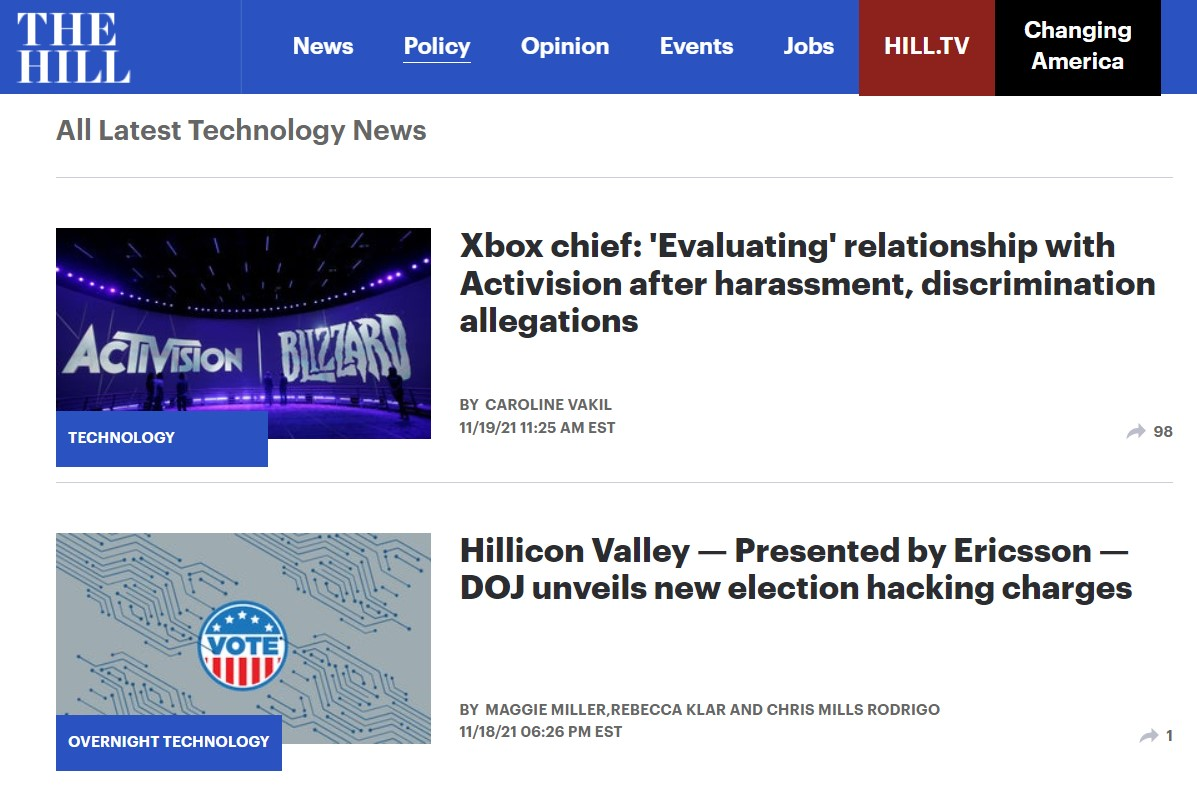

In [2]:
from IPython.display import Image
Image(f"{outcome_folder}/Capture.jpg")

### Reasons Why I Chose the Web Site

이번 프로젝트를 통해서 기술과 관련된 키워드를 뽑아내면 유의미할 것이라는 생각이 들었음. 그 중에서 theHill.com은 "TECH"라는 카테고리가 분류되어있었으면, 다른 정치 및 스포츠 관련 기사여도 기술과 조금이라도 관련이 있으면 "TECH" 카테고리에 들어와 있어서 훨씬 더 광범위한 데이터 분석이 가능할 것으로 예상해서 선정.   

### Total Number of Web Articles Collected

12819 건

### Data Time Range

2015-01-27 ~ 2021-11-12 (약 6년)

### Key Findings and Lessons

- theHill.com이 기술과 관련된 기사 외에도 정치와 관련된 텍스트들이 고르게 반영되었음.  
- 특히 페이스북 정보 유출 사건과 같이 큰 사건이 있는 경우 해당 키워드가 많이 발견되는 것을 확인할 수 있었음. 

### Major Challenges

- 본문에 유튜브 혹은 다른 링크들이 들어간 경우 구조가 조금씩 달라서 그 부분을 처리하는데 까다로웠음.
- 키워드 분석에 있어 다양한 종류의 stopword를 설정해주어야 깔끔한 데이터를 뽑아낼 수 있었음.

## Installing Necessary Packages

In [3]:
! pip install --user nltk scikit-learn pyldavis textblob

     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 1.4 MB/s 
     |████████████████████████████████| 11.3 MB 38.3 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=32ee3233005980be4fcee090fda39dc286f2d8ee5c5ef8619231f5cbb0e59d05
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1

## Loading Data

In [73]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)
df = pd.read_csv(f"{outcome_folder}/theHill.csv", sep="\t") #read_csv 함수를 이용해서 csv파일을 읽어오기 // sep은 구분(separator)
df = df.dropna(subset=["Body"],axis=0)
df = df
df.Body = df.Body.astype(str)
df

/root/.local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Title,Author,Date,Body
0,FBI investigating 11 attacks on Calif. fiber-optic lines,By David McCabe,07/01/15 03:19 PM,Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that...
1,Sprint backtracks on data speeds after backlash,By David McCabe,07/01/15 12:22 PM,Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced a...
2,China tightens Internet control with national security law,By Cory Bennett,07/01/15 09:45 AM,China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s information...
3,Outgoing Twitter CEO: 'Regulation is a threat to free speech',By David McCabe,07/01/15 09:39 AM,Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I think...
4,Apple loses appeal of $450M antitrust case,By David McCabe,06/30/15 06:07 PM,Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related ...
...,...,...,...,...
12814,Bipartisan attorneys general urge Facebook to scrap planned Instagram for kids,By Rebecca Klar,05/10/21 10:55 AM,"A bipartisan group of 45 attorneys general are urging Facebook to abandon plans to launch an Instagram for kids platform, citing concerns about ch..."
12815,Amazon blocks 10B listings in crackdown on counterfeits,By Rebecca Klar,05/10/21 10:12 AM,"Amazon blocked more than 10 billion listings as part of its push toward driving out counterfeit products, the e-commerce giant said Monday. Amazon..."
12816,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","By Maggie Miller,Chris Mills Rodrigo and Rebecca Klar",05/07/21 06:03 PM,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."
12817,Google child care workers petition for transportation stipend,By Chris Mills Rodrigo,05/07/21 04:23 PM,A group of Google workers who provide child care services and education for other employees' kids are circulating a petition urging the Silicon Va...


https://thehill.com/policy/technology/246597-apple-focused-on-next-steps-after-losing-antitrust-appeal

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12818 entries, 0 to 12818
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   12818 non-null  object
 1   Author  12818 non-null  object
 2   Date    12818 non-null  object
 3   Body    12818 non-null  object
dtypes: object(4)
memory usage: 500.7+ KB


## Popular Keywords Ranking

In [6]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])
from nltk.util import ngrams
from textblob import TextBlob

df["sentences"] = df.Body.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))
df["words"] = df.Body.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
df["polarity"] = df.Body.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.Body.apply(lambda x: TextBlob(x).sentiment.subjectivity)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df

,Title,Author,Date,Body,sentences,num_sentences,words,num_words,tagged_words,nouns,polarity,subjectivity
0,FBI investigating 11 attacks on Calif. fiber-optic lines,By David McCabe,07/01/15 03:19 PM,Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that...,[Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday tha...,4,"[Federal, authorities, are, investigating, eleven, incidents, of, fiber-optic, lines, being, cut, in, the, Bay, Area, of, California.The, FBI, sai...",255,"[(Federal, JJ), (authorities, NNS), (are, VBP), (investigating, VBG), (eleven, JJ), (incidents, NNS), (of, IN), (fiber-optic, JJ), (lines, NNS), (...","[authorities, incidents, lines, Bay, Area, California.The, FBI, Wednesday, line, Alameda, County, Calif.ADVERTISEMENT, <, <, [, CDATA, [, //, >, <...",0.150476,0.359206
1,Sprint backtracks on data speeds after backlash,By David McCabe,07/01/15 12:22 PM,Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced a...,[Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced ...,8,"[Sprint, said, late, Tuesday, night, that, it, would, stop, limiting, data, available, to, unlimited, plan, users, after, a, public, backlash.The,...",406,"[(Sprint, NNP), (said, VBD), (late, JJ), (Tuesday, NNP), (night, NN), (that, IN), (it, PRP), (would, MD), (stop, VB), (limiting, VBG), (data, NNS)...","[Sprint, Tuesday, night, data, plan, users, backlash.The, company, talk, data, text, plan, week, data, speeds, consumers, video.ADVERTISEMENT, <, ...",0.186695,0.440566
2,China tightens Internet control with national security law,By Cory Bennett,07/01/15 09:45 AM,China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s information...,[China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s informatio...,5,"[China, has, unanimously, approved, a, wide-ranging, national, security, law, that, grants, authorities, vague, jurisdiction, to, secure, the, cou...",678,"[(China, NNP), (has, VBZ), (unanimously, RB), (approved, VBN), (a, DT), (wide-ranging, JJ), (national, JJ), (security, NN), (law, NN), (that, WDT)...","[China, security, law, authorities, jurisdiction, country, ’, information, technology.The, move, business, community, China, technology, firms, ri...",0.066914,0.393396
3,Outgoing Twitter CEO: 'Regulation is a threat to free speech',By David McCabe,07/01/15 09:39 AM,Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I think...,[Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I thin...,6,"[Twitter, 's, outgoing, CEO, said, during, an, interview, published, Tuesday, that, government, rules, endanger, free, expression., “, I, will, sa...",298,"[(Twitter, NNP), ('s, POS), (outgoing, VBG), (CEO, NNP), (said, VBD), (during, IN), (an, DT), (interview, NN), (published, VBD), (Tuesday, NNP), (...","[Twitter, CEO, interview, Tuesday, government, rules, expression., “, regulation, threat, speech, ”, Dick, Costolo, Guardian, Twitter, <, <, [, CD...",0.099506,0.461823
4,Apple loses appeal of $450M antitrust case,By David McCabe,06/30/15 06:07 PM,Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related ...,[Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related...,6,"[Apple, said, it, is, f

In [8]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter

In [9]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english") 

import string
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '”', '“',  '—', '…', "could", "might", "would"] + \
                  ["<",">","CDATA","[","]","//","''","``","--","6","cdata"] +\
                  ["are","of","it","to","that","in","the","a","I","an","for","who","'s","said","for","A","on","has","also","new"]+\
                  ["dfp-ad-mosad_1","make","dfp-ad-incontent_desk_1","including","function","according","googletag.display","googletag.cmd.push","companies","access"]+\
                  ["month","told","first","last","tuesday",".jan","jan.","monday","two","year","wednesday", "thursday","days", "one", "people","week","house","hill","company"]+\
                  ["time","law","statement","commission","group","congress","care","reelection","chariman","overnight","court"]

### Overall Popular Keywords

In [10]:
counter_all = get_counter(df, global_stopwords+local_stopwords)
counter_all.most_common(50)

[('federal', 5886),
 ('biden', 5100),
 ('president', 5095),
 ('ceo', 5001),
 ('facebook', 4970),
 ('like', 4846),
 ('u.s.', 4735),
 ('tech', 4680),
 ('action', 4521),
 ('government', 4510),
 ('information', 4376),
 ('trump', 4361),
 ('security', 4206),
 ('presented', 4179),
 ('media', 4121),
 ('public', 4118),
 ('campaign', 4112),
 ('back', 4079),
 ('data', 4066),
 ('social', 4020),
 ('use', 4017),
 ('says', 3985),
 ('take', 3982),
 ('technology', 3982),
 ('report', 3973),
 ('users', 3848),
 ('twitter', 3778),
 ('national', 3758),
 ('committee', 3753),
 ('bill', 3737),
 ('announced', 3726),
 ('health', 3674),
 ('senate', 3652),
 ('concerns', 3649),
 ('role', 3647),
 ('lawmakers', 3585),
 ('many', 3545),
 ('democrats', 3528),
 ('may', 3478),
 ('project', 3468),
 ('million', 3428),
 ('wrote', 3426),
 ('internet', 3385),
 ('made', 3363),
 ('attack', 3355),
 ('communications', 3354),
 ('comes', 3328),
 ('30', 3322),
 ('used', 3300),
 ('earlier', 3295)]

전체 워드들을 대상으로 한 키워드 랭킹은 stopword로서 제외하기에 애매한 키워드들이 다수 포함된 관계로 특별히 인상 깊지는 않았음. 본문 보다는 제목을 대상으로 한 키워드 분석이 오히려 유의미한 결과를 보여줄 수 있지 않을까 생각됨.

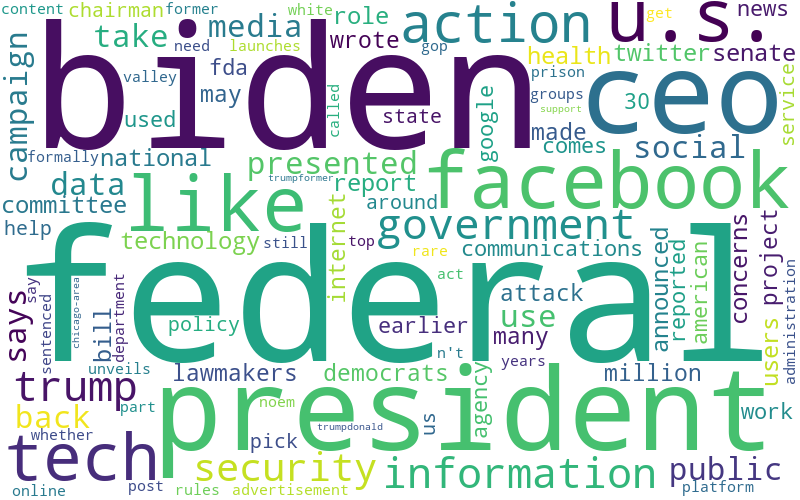

In [11]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter_all, f"{outcome_folder}/theHill_all.png", 100)

### Popular Nouns Representing Hot Topics

In [12]:
counter_nouns = get_counter(df, global_stopwords+local_stopwords, "NN")
counter_nouns.most_common(50)

[('biden', 5099),
 ('president', 5095),
 ('ceo', 5001),
 ('facebook', 4968),
 ('u.s.', 4735),
 ('action', 4521),
 ('government', 4509),
 ('information', 4376),
 ('trump', 4348),
 ('security', 4206),
 ('media', 4121),
 ('campaign', 4112),
 ('data', 4050),
 ('tech', 3995),
 ('technology', 3982),
 ('users', 3842),
 ('twitter', 3776),
 ('committee', 3753),
 ('bill', 3737),
 ('health', 3674),
 ('senate', 3651),
 ('role', 3647),
 ('concerns', 3628),
 ('federal', 3612),
 ('lawmakers', 3584),
 ('democrats', 3528),
 ('project', 3461),
 ('report', 3448),
 ('communications', 3353),
 ('attack', 3291),
 ('google', 3262),
 ('news', 3259),
 ('agency', 3231),
 ('fda', 3208),
 ('internet', 3192),
 ('policy', 3153),
 ('chairman', 3126),
 ('state', 3092),
 ('service', 3082),
 ('department', 3040),
 ('platform', 3036),
 ('part', 3015),
 ('administration', 2941),
 ('pick', 2908),
 ('groups', 2897),
 ('years', 2892),
 ('rules', 2885),
 ('rare', 2878),
 ('prison', 2849),
 ('advertisement', 2847)]

명사들만을 대상으로 한 키워드 분석에서는 president, biden, trump와 같은 정치 관련 표현들이 상위권에 등장했고, 기술과 관련된 facebook, security, twitter과 같은 표현들도 꽤 높은 순위에 등장했음  

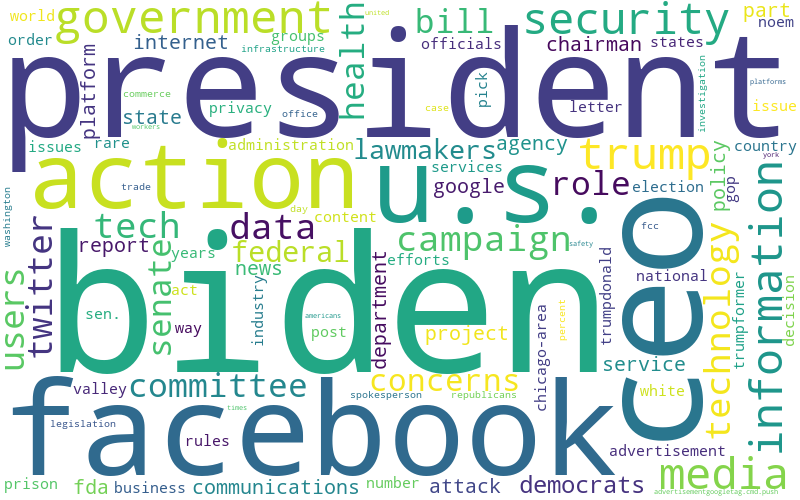

In [13]:
draw_wordcloud(counter_nouns, f"{outcome_folder}/theHill_nouns.png", 100)

본문 내용에 "facebook" 키워드를 masking 했을때

In [19]:
mask = df.Body.str.contains("facebook", case=False)
df[mask][["Date", "Title", "Body"]]

,Date,Title,Body
10,06/30/15 06:30 AM,What Hulk Hogan can teach us about the need for revenge porn laws,With comedian John Oliver's poignant rant about revenge porn — the nonconsensual distribution of sexually explicit images without the subject's co...
17,06/28/15 08:00 AM,Net neutrality starts with a whimper,It has been a quiet first two weeks for net neutrality.While the Federal Communications Commission’s new rules governing Internet providers like u...
19,06/26/15 01:19 PM,Tech companies celebrate gay marriage decision,Giant tech companies quickly celebrated the Supreme Court decision Friday that outlined a constitutional right to gay marriage.The industry has be...
23,06/25/15 06:04 PM,OVERNIGHT TECH: FCC setting stage for spectrum auction,LEDE: The FCC is getting ready to set the stage for 2016's spectrum auction.Chairman Tom Wheeler on Thursday circulated his proposed rules for the...
37,06/23/15 05:56 PM,OVERNIGHT TECH: Tech firms scrub Confederate flag listings,"LEDE: A trio of e-commerce companies on Tuesday rushed to scrub sales listings of the Confederate flag.Amazon, one of the largest online sales com..."
...,...,...,...
12808,05/11/21 12:08 PM,Democrats urge Facebook to reverse WhatsApp privacy update,Members of the Congressional Hispanic Caucus on Tuesday urged Facebook to reverse plans for a required update to its messaging platform subsidiary...
12811,05/10/21 06:14 PM,Hillicon Valley: Colonial Pipeline attack underscores US energy's vulnerabilities | Biden leading 'whole-of-government' response to hack | Attorne...,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."
12814,05/10/21 10:55 AM,Bipartisan attorneys general urge Facebook to scrap planned Instagram for kids,"A bipartisan group of 45 attorneys general are urging Facebook to abandon plans to launch an Instagram for kids platform, citing concerns about ch..."
12816,05/07/21 06:03 PM,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."


### Popular Adjectives Representing Emotional Aspects

In [14]:
counter_adjs = get_counter(df, global_stopwords+local_stopwords, "JJ")
counter_adjs.most_common(50)

[('federal', 3849),
 ('social', 3760),
 ('many', 3465),
 ('public', 3370),
 ('unveils', 2912),
 ('top', 2625),
 ('former', 2596),
 ('democratic', 2538),
 ('recent', 2381),
 ('major', 2345),
 ('political', 2339),
 ('next', 2327),
 ('american', 2221),
 ('tech', 2208),
 ('national', 2052),
 ('several', 2045),
 ('potential', 1993),
 ('able', 1974),
 ('foreign', 1890),
 ('critical', 1784),
 ('digital', 1774),
 ('presidential', 1766),
 ('important', 1761),
 ('online', 1756),
 ('similar', 1741),
 ('legal', 1738),
 ('private', 1642),
 ('different', 1607),
 ('general', 1605),
 ('personal', 1578),
 ('global', 1537),
 ('congressional', 1534),
 ('past', 1532),
 ('clear', 1527),
 ('sure', 1516),
 ('corporate', 1464),
 ('latest', 1454),
 ('open', 1445),
 ('good', 1438),
 ('bipartisan', 1435),
 ('free', 1405),
 ('chief', 1383),
 ('certain', 1377),
 ('significant', 1316),
 ('least', 1308),
 ('net', 1303),
 ('big', 1286),
 ('much', 1253),
 ('local', 1242),
 ('large', 1214)]

형용사들만을 대상으로 한 키워드 분석에서는 뉴스를 게시하는 사이트 특성상 social, public, democratic, federal과 같은 사회와 관련된 표현들이 가장 두드러지게 등장했음. 

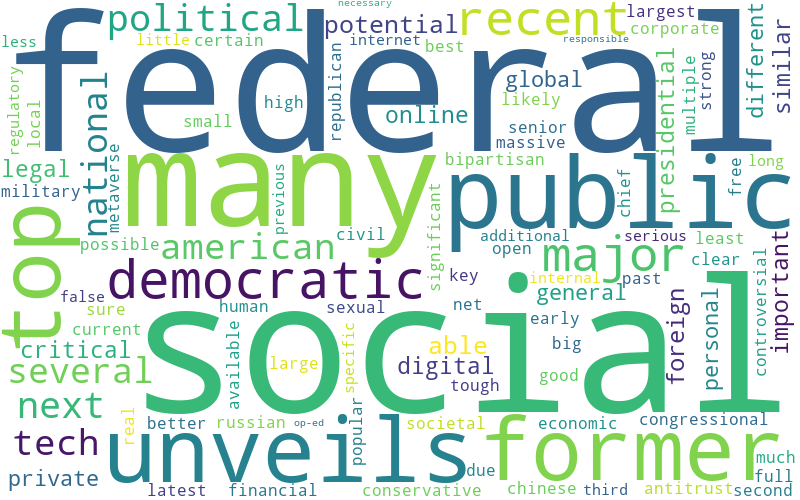

In [15]:
draw_wordcloud(counter_adjs, f"{outcome_folder}/theHill_adjs.png", 100)

### Popular Verbs Representing Behavioral Aspects

In [16]:
counter_verbs = get_counter(df, global_stopwords+local_stopwords, "VB")
counter_verbs.most_common(50)

[('presented', 4177),
 ('says', 3951),
 ('take', 3950),
 ('announced', 3721),
 ('wrote', 3426),
 ('made', 3357),
 ('comes', 3323),
 ('used', 3279),
 ('reported', 3247),
 ('say', 2903),
 ('launches', 2888),
 ('get', 2856),
 ('help', 2844),
 ('use', 2788),
 ('called', 2788),
 ('sentenced', 2761),
 ('using', 2578),
 ('need', 2479),
 ('come', 2462),
 ('added', 2419),
 ('go', 2391),
 ('working', 2371),
 ('see', 2360),
 ('saying', 2292),
 ('know', 2214),
 ('allow', 2155),
 ('going', 2145),
 ('protect', 2131),
 ('want', 2124),
 ('asked', 2104),
 ('provide', 2066),
 ('found', 1986),
 ('released', 1984),
 ('continue', 1937),
 ('think', 1935),
 ('put', 1930),
 ('give', 1857),
 ('include', 1849),
 ('making', 1829),
 ('set', 1828),
 ('work', 1812),
 ('warned', 1810),
 ('sent', 1775),
 ('believe', 1708),
 ('following', 1683),
 ('taken', 1678),
 ('taking', 1625),
 ('keep', 1621),
 ('create', 1581),
 ('came', 1579)]

동사로 한정지은 키워드 분석에서는 뉴스 기사에서 대부분 누군가가 한 말을 인용하는 경우가 많아서 presented, made, says, announced와 같은 언급과 관련된 키워드들이 눈에 띔.



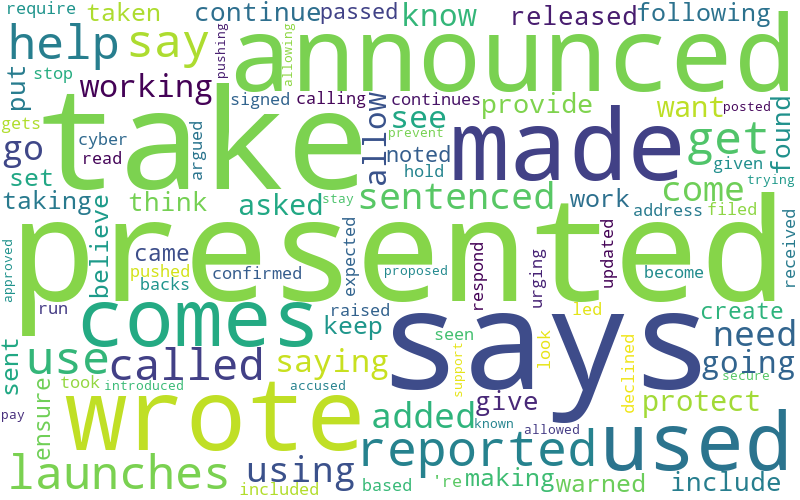

In [17]:
draw_wordcloud( counter_verbs , f"{outcome_folder}/theHill_verb.png", 100)

## Time Series Analysis

In [20]:
df_temp = df[df.Date != "Unknown"]
df_temp.date_noTime = df_temp.Date.apply(lambda x: x.split(" ")[0])
df_temp.date = df_temp.date_noTime.apply(lambda x: "20"+x.split("/")[2]+"/" +x.split("/")[0]+"/"+x.split("/")[1])
df_temp.date=pd.to_datetime(df_temp.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_temp.date.min(), df_temp.date.max()

(Timestamp('2015-01-27 00:00:00'), Timestamp('2021-11-12 00:00:00'))

수집된 웹 페이지들이 게재된 기간은 2015년 1월 27일부터 2021년 11월 12일로서 약 6년의 time range를 가짐. 

In [22]:
import numpy as np

count = pd.Series(data=1, index=df_temp.date).resample(rule="m").count()
count

Date
2015-01-31     48
2015-02-28    197
2015-03-31    203
2015-04-30    193
2015-05-31    186
             ... 
2021-07-31    156
2021-08-31    123
2021-09-30    117
2021-10-31    132
2021-11-30     58
Freq: M, Length: 83, dtype: int64

In [23]:
count.mean(), count.std()

(154.3975903614458, 33.6241564438702)

월별 게재 건수의 평균은 약 154건, 표준편차는 약 33.6건으로서, 매달 평균 154건 정도가 게재되었음. 

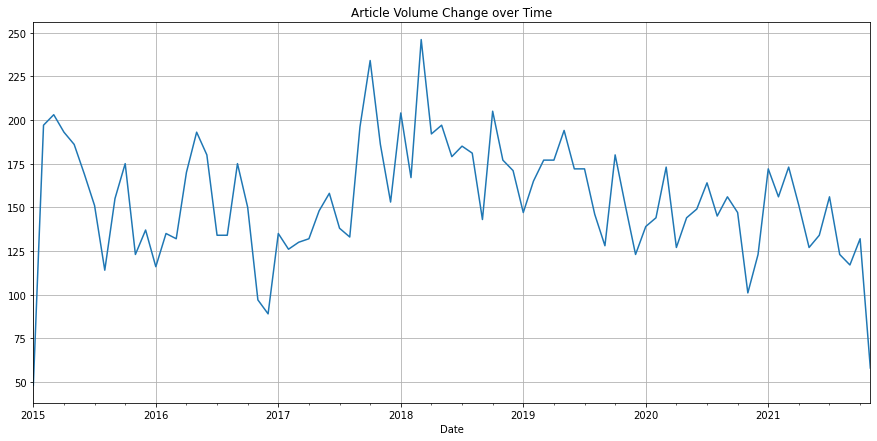

In [24]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

### Peak Day Analysis

In [25]:
count.max(), count.idxmax()

(246, Timestamp('2018-03-31 00:00:00', freq='M'))

가장 많이 게재된 peak month는 2018년 3월달로 특히 3월 17일에 페이스북 정보 유출 사건이 터졌던 시기로 페이스북과 보안과 관련된 기사들이 많이 게재되었음.

In [26]:
mask = df_temp.Title.str.contains("facebook", case=False)
df_temp[mask][(df_temp.date < "2018-03-31") & (df_temp.date >= "2018-03-01")][["Title", "Body"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Title,Body
5000,"Senate committee invites Facebook, Twitter and Google CEOs to testify",Senate Judiciary Committee Chairman Chuck GrassleyChuck GrassleySenators introduce bipartisan bill to limit mergers by tech giants McConnell blas...
5003,Facebook stock falls 6 percent after FTC announces probe,Facebook stock plunged Monday after the Federal Trade Commission (FTC) announced it was investigating the social media company over a data breach ...
5004,FTC confirms it's investigating Facebook,The Federal Trade Commission (FTC) on Monday confirmed that it had opened an investigation into Facebook’s privacy practices following reports tha...
5005,Facebook favorability plunges,"Facebook’s net favorability has dropped 28 points since last fall, according to a new survey. A SurveyMonkey poll conduced for Axios found that th..."
5006,"Facebook collected phone call, text message data: report","Facebook collected users' phone call and text message data for two years, according to a report from Ars Technica. The news outlet cites various F..."
5009,Poll: Less than half of Americans trust Facebook to obey U.S. privacy laws,Less than half of Americans said they trust social media giant Facebook to follow U.S. privacy laws amid the platform's recent scandal involving d...
5010,Zuckerberg takes out full-page newspaper ads to pledge Facebook’s ‘responsibility’,"Facebook CEO Mark ZuckerbergMark ZuckerbergPrince Harry says he warned Twitter's Dorsey about Jan. 6 riot Facebook gets new corporate name, but so..."
5012,Warner: Congress should 'relook' at how to regulate Facebook,Sen. Mark WarnerMark Robert WarnerSenators urging federal investigation into Liberty University's handling of sexual assault claims Warner says 't...
5014,Companies pull ads from Facebook after Cambridge Analytica controversy,Several companies have suspended their advertisements on Facebook after it was revealed that the data firm Cambridge Analytica improperly used the...
5019,Bolton super PAC benefited from leaked Facebook data: report,A super PAC run by incoming Trump national security adviser John Bolton was an early customer of Cambridge Analytica and benefited from the Facebo...


실제로 이 기간 동안 게재된 글들의 샘플과 키워드 랭킹을 살펴보면 facebook과 정보 유출과 관련된 키워드들을 확인할 수 있음

In [27]:
counter_peak = get_counter(df_temp[(df_temp.date > "2018-03-17") & (df_temp.date <"2018-03-28")], global_stopwords+local_stopwords,"NN")
counter_peak.most_common(30)

[('facebook', 75),
 ('data', 71),
 ('ceo', 71),
 ('campaign', 68),
 ('firm', 67),
 ('cambridge', 66),
 ('analytica', 66),
 ('trump', 60),
 ('users', 57),
 ('information', 56),
 ('concerns', 55),
 ('safety', 54),
 ('biden', 54),
 ('action', 50),
 ('role', 49),
 ('twitter', 48),
 ('whistleblower', 47),
 ('fda', 46),
 ('mark', 45),
 ('president', 45),
 ('media', 45),
 ('dorsey', 44),
 ('attack', 44),
 ('harry', 44),
 ('health', 44),
 ('riot', 44),
 ('trumpdonald', 43),
 ('chicago-area', 43),
 ('trumpformer', 43),
 ('pick', 43)]

## Document Clustering

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df.Body)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ad', 'cmd', 'dfp', 'display', 'googletag', 'incontent_desk_1', 'jan', 'mosad_1', 'push'] not in stop_words.
  % sorted(inconsistent)


In [29]:
X.shape

(12818, 51645)

There are 12,818 documents and 51,663 words, or features. 

### K-Means Clustering

### Step 1. Choose the number of clusters

In [30]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

### Step 3. Fit the model using the input data

In [32]:
%time kmeans.fit(X)

CPU times: user 20.4 s, sys: 127 ms, total: 20.5 s
Wall time: 11.7 s


KMeans(n_clusters=5, random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [33]:
kmeans.labels_

array([2, 1, 3, ..., 3, 2, 2], dtype=int32)

In [34]:
df["cluster"] = kmeans.labels_

In [35]:
df[["Title", "Body", "cluster"]]

,Title,Body,cluster
0,FBI investigating 11 attacks on Calif. fiber-optic lines,Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that...,2
1,Sprint backtracks on data speeds after backlash,Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced a...,1
2,China tightens Internet control with national security law,China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s information...,3
3,Outgoing Twitter CEO: 'Regulation is a threat to free speech',Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I think...,2
4,Apple loses appeal of $450M antitrust case,Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related ...,2
...,...,...,...
12814,Bipartisan attorneys general urge Facebook to scrap planned Instagram for kids,"A bipartisan group of 45 attorneys general are urging Facebook to abandon plans to launch an Instagram for kids platform, citing concerns about ch...",4
12815,Amazon blocks 10B listings in crackdown on counterfeits,"Amazon blocked more than 10 billion listings as part of its push toward driving out counterfeit products, the e-commerce giant said Monday. Amazon...",2
12816,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley...",3
12817,Google child care workers petition for transportation stipend,A group of Google workers who provide child care services and education for other employees' kids are circulating a petition urging the Silicon Va...,2


In [36]:
count2 = df.cluster.value_counts()
count2

2    6560
3    2549
4    1891
1    1324
0     494
Name: cluster, dtype: int64

전체 문서들에 대해 다양한 개수의 클러스터를 찾아본 결과 5개의 클러스터를 찾았을 때 비교적 균형 있는 클러스터들을 구할 수 있었음.  

In [37]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th = df.cluster.value_counts().index

In [38]:
df[df.cluster == cluster_1st].sample(10, random_state=0)[["Title", "Body", "cluster"]]     # the largest cluster

,Title,Body,cluster
4105,Former Equifax CEO: Employee responsible for patching software has stepped down,Former Equifax CEO Richard Smith said Wednesday that the employee responsible for not updating the company’s security software had stepped down in...,2
9960,"Google, YouTube fined record $170 million for violating children's privacy","Google will pay $170 million to settle charges that YouTube made millions of dollars over the years from violating children's privacy laws, the Fe...",2
6458,"AT&T, Verizon say they'll stop sharing location data with third-party brokers",Verizon and AT&T announced Tuesday that they will no longer sell location data to third-party aggregators after revelations that the information w...,2
9395,Digital tax to take effect in Italy on Jan. 1,A digital services tax is set to take effect in Italy on Jan. 1 as policymakers in the U.S. raise concern about these types of taxes on tech giant...,2
8048,FCC to consider designating '988' as national suicide prevention hotline,"The Federal Communications Commission (FCC) is moving forward with a proposal to create a three-digit, nationwide suicide prevention and mental he...",2
4368,Senate Dem wants answers on FTC's quick approval of Amazon-Whole Foods deal,Sen. Amy KlobucharAmy KlobucharLet's not go overboard regulating Big Tech acquisitions Move deliberately and rebuild American tech leadership Hil...,2
6034,Snapchat apologizes after map calls New York 'Jewtropolis',"Snap, the company behind Snapchat, apologized on Thursday after its map feature mislabeled New York City as “Jewtropolis.”Snap said that the incid...",2
7318,Netflix warns people against doing 'Bird Box' challenge,"Netflix is warning the public against participating in the ""'Bird Box' challenge,"" in which people blindfold themselves while doing activities ran...",2
10875,Pentagon watchdog unable to 'definitively' determine if White House influenced JEDI contract,"The Pentagon's watchdog in a report released on Wednesday said it was not able to ""definitively determine"" whether the White House influenced the ...",2
7084,"Illinois gov., Chicago mayor ask Amazon to reconsider Chicago after scrapping NYC plans",Two top Illinois Democrats urged Amazon on Thursday to reconsider Chicago for possible expansion after the company scrapped plans for a new headqu...,2


가장 큰 클러스터는 정치와 약간의 기술에대한 내용임을 쉽게 파악할 수 있음. 

In [39]:
counter_max = get_counter(df[df.cluster == cluster_1st], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('u.s.', 2062),
 ('federal', 2061),
 ('ceo', 2039),
 ('president', 1977),
 ('like', 1927),
 ('government', 1802),
 ('tech', 1749),
 ('biden', 1732),
 ('use', 1732),
 ('action', 1713),
 ('information', 1707),
 ('technology', 1658),
 ('announced', 1617),
 ('public', 1591),
 ('users', 1547),
 ('advertisement', 1547),
 ('reported', 1543),
 ('many', 1541),
 ('million', 1537),
 ('data', 1519),
 ('campaign', 1474),
 ('back', 1471),
 ('media', 1457),
 ('presented', 1445),
 ('take', 1427),
 ('used', 1420),
 ('security', 1418),
 ('made', 1417),
 ('google', 1416),
 ('trump', 1407)]

In [40]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["Title", "Body", "cluster"]]     # the second largest cluster

,Title,Body,cluster
7889,Experts see 5G as defense to 'Stingray' spying,Security experts and privacy advocates are hopeful the rollout of the new 5G wireless network could eliminate a glaring surveillance vulnerability...,3
2831,WhatsApp encryption said to thwart wiretap order: report,The Justice Department is discussing how to proceed with a criminal investigation in which investigators have been stymied by the encryption of th...,3
6523,"Lawmakers target ZTE, Huawei in defense bill",A bipartisan group of senators is trying to use the must-pass National Defense Authorization Act (NDAA) to target Chinese technology companies.On ...,3
12264,Overnight Hillicon Valley — Apple issues security update against spyware vulnerability,"Today is Monday. Welcome to Hillicon Valley, detailing all you need to know about tech and cyber news from Capitol Hill to Silicon Valley. Subscri...",3
12692,Hillicon Valley: Biden steps up pressure on Russia to go after cyber criminals | All JBS facilities up and running after ransomware attack | Justi...,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley...",3
2820,Overnight Tech: Groups grade 2016 candidates on tech issues,"LEDE: The Senate Commerce Committee convened a mostly-smooth hearing on self-driving cars Tuesday afternoon, but lawmakers expressed worries and g...",3
12432,Hillicon Valley: Democrats urge tech CEOs to combat Spanish disinformation | Amazon fined $886M by EU regulators,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley...",3
815,Dems look to advance tech's march in Cuba,"The future is coming to Cuba, and it looks a lot like the Internet.Cubans — especially young ones — are “hungry” for technology and access to the ...",3
10710,Key House lawmakers reach deal on surveillance law amendment,Key House lawmakers have struck a deal on an amendment that would block law enforcement from accessing Americans' web browsing history without a w...,3
9293,Bezos phone breach escalates fears over Saudi hacking,The alleged hacking of Amazon CEO Jeff BezosJeffrey (Jeff) Preston BezosBlue Origin passenger Glen De Vries killed in New Jersey plane crash Equil...,3


두번째로 큰 클러스터 또한 정치와 관련된 키워드가 상위에 있지만 "security" 처럼 기술과 관련된 키워드들도 이전보단 더 등장한 것을 확인할 수 있음

In [41]:
counter_max = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('biden', 2032),
 ('security', 1938),
 ('tech', 1809),
 ('bill', 1808),
 ('federal', 1801),
 ('trump', 1792),
 ('government', 1778),
 ('senate', 1726),
 ('committee', 1714),
 ('presented', 1712),
 ('national', 1680),
 ('u.s.', 1678),
 ('president', 1674),
 ('report', 1535),
 ('democrats', 1534),
 ('back', 1524),
 ('action', 1514),
 ('valley', 1507),
 ('lawmakers', 1502),
 ('facebook', 1466),
 ('ceo', 1457),
 ('campaign', 1419),
 ('information', 1417),
 ('technology', 1383),
 ('act', 1372),
 ('health', 1371),
 ('concerns', 1368),
 ('american', 1366),
 ('role', 1354),
 ('gop', 1353)]

In [42]:
df[df.cluster == cluster_5th].sample(10, random_state=0)[["Title", "Body", "cluster"]]     # the smallest cluster 

,Title,Body,cluster
6417,Uber wins temporary London operating license,"Uber is being awarded a 15-month probationary license to keep operating in London, after a judge ruled that the company cleaned up its act since r...",0
2305,Uber customers gripe to feds about spam,"Dozens of people in Austin, Texas, complained to federal regulators in early May that Uber was spamming their phones with unwanted text messages a...",0
5868,Waymo testing self-driving cars without human safety monitor,"Waymo, a subsidiary of Google parent company Alphabet, has started to test fully autonomous cars on public roads. Since October, Waymo has been te...",0
4597,Uber rolls out in-app tipping,Uber on Thursday rolled out a feature that allows riders in over 100 cities in the U.S. and Canada to tip drivers through their app.Among the majo...,0
1957,GOP field knocks Clinton on sharing economy,Republican presidential candidates are knocking Hillary ClintonHillary Diane Rodham ClintonManchin says he has 'no idea' if he'll run for reelecti...,0
936,Uber to start work on driverless technology,"Uber is partnering with Carnegie Mellon University to develop mapping and driverless car technology, the company announced Monday. The app-based t...",0
2565,Ray LaHood joins Uber advisory board,"Former Transportation Secretary Ray LaHood has joined Uber’s public policy advisory board, the ride-hailing company announced Wednesday.ADVERTISEM...",0
4890,Justice Department opens criminal investigation into Uber: report,The Justice Department has opened a criminal investigation into ride-hailing company Uber over software that its drivers used to avoid law enforce...,0
7855,Uber will offer free rides to polling stations on Election Day,"Uber said Thursday that it will offer free rides to polling stations on Election Day, as well as an in-app feature that lets riders know where to ...",0
7167,Family files lawsuit in fatal Uber self-driving incident,"The family of a woman who died last year after being hit by a self-driving Uber car has sued the city of Tempe, Ariz., where the woman, Elaine Her...",0


가장 작은 클러스터는 기술 중에서도 이동 수단과 관련된 키워드들이 다수 발견됨. 

In [43]:
counter_min = get_counter(df[df.cluster == cluster_5th], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('uber', 451),
 ('drivers', 260),
 ('ride-hailing', 222),
 ('like', 191),
 ('lyft', 189),
 ('federal', 174),
 ('public', 172),
 ('technology', 168),
 ('ceo', 165),
 ('car', 164),
 ('work', 162),
 ('safety', 161),
 ('driver', 158),
 ('service', 156),
 ('employees', 153),
 ('self-driving', 152),
 ('take', 151),
 ('cars', 151),
 ('reported', 145),
 ('million', 141),
 ('earlier', 141),
 ('get', 137),
 ('part', 133),
 ('former', 131),
 ('announced', 129),
 ('transportation', 129),
 ('vehicles', 127),
 ('help', 127),
 ('says', 124),
 ('state', 124)]

## Topic Modeling

### Step 1. Choose the number of topics

In [65]:
num_topics = 2

### Step 2. Initialize a model object for LDA topic modeling

In [66]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=2, random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [67]:
%time lda.fit(X)

CPU times: user 57.4 s, sys: 177 ms, total: 57.5 s
Wall time: 57.5 s


LatentDirichletAllocation(n_components=2, random_state=0)

### Step 4. Examine the output of topic modeling

In [68]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [69]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
243.28 * fcc + 145.14 * uber + 131.62 * rules + 131.33 * neutrality + 127.91 * net + 112.67 * internet + 94.69 * providers + 91.21 * broadband + 83.94 * service + 82.75 * pai

*** Topic 1:
499.64 * facebook + 294.80 * trump + 261.90 * data + 258.51 * twitter + 253.73 * google + 230.06 * tech + 229.53 * bill + 209.45 * biden + 202.21 * security + 197.44 * users



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Topic Model Visualization

In [70]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis: https://github.com/bmabey/pyLDAvis

In [71]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
1      0.077676  0.0       1        1  86.76255
0     -0.077676  0.0       2        1  13.23745, topic_info=              Term        Freq       Total Category  logprob  loglift
18048          fcc  134.000000  134.000000  Default  30.0000  30.0000
40093        rules  106.000000  106.000000  Default  29.0000  29.0000
24392     internet  145.000000  145.000000  Default  28.0000  28.0000
47659         uber   65.000000   65.000000  Default  27.0000  27.0000
31580          net   63.000000   63.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
12625    customers   19.773679   52.055262   Topic2  -6.8793   1.0542
38165  regulations   18.374225   41.502095   Topic2  -6.9527   1.2073
36439     proposal   18.550597   52.125262   Topic2  -6.9432   0.9890
18105      federal   21.274505  143.262322   Topic2  -6.8062   0.1150
11411    consumers   18.349305   69.241380   Topic2  -6.9541   0.6941

[139 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
2737       1  0.989961     account
2750       1  0.994407    accounts
3090       1  0.993466         ads
3328       1  0.840668      agency
3328       2  0.162402      agency
...      ...       ...         ...
50318      2  0.009512       white
50579      1  0.267577    wireless
50579      2  0.735837    wireless
51302      1  0.999094     youtube
51570      1  0.998595  zuckerberg

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

토픽의 개수를 2보다 크게 잡으면 대부분 겹치는 작은 토픽들로 나누어지는 거나 의미 없는 토픽이 설정되는 것을 확인했음. 크게 정치와 기술 관련 토픽들이 한 묶음 그외 이동 수단과 관련된 토픽들이 한묶음인 것을 확인할 수 있음.

### Future Work


- theHill.com은 다른 카테고리의 기사들도 비슷한 구조를 갖고 있기 때문에 전체 카테고리에대해서 데이터 분석을 하면 다양한 주제로 확장할 수 있을 것으로 판단 
- 10년 치 정도의 데이터를 가지고 Time series 분석시  peak year 분석을 통해서  연도별 기술에대한 관심의 흐름을 분석하는 것도 의미있을 것이라고 생각됨.
- theHill.com에서 얼마나 다른 사람들이 공유했는지를 알 수있는 "shared" 요소를 활용하면 키워드 분석 뿐만 아니라 어떤 주제의 기사들을 사용자들이 많이 찾아보는지 조사하는 것도 의미있을 것이라고 생각됨.
- 세세한 주제별로 데이터 분석을 할 수 있다면 더 의미있을 것이라고 판단됨
  (ex. Facebook, Google, Twitter ...)